# Predicting Diamond Prices

This dataset contains 10 features in which 'Price(in US dollars)' is dependent feature.

1. Carat(Weight of Diamond) -> Weight of Diamond.22. Cut(Quality) -> Quality of cut (Fair, Good, Very Good, Premium, Ideal).
 3. Color -> Diamond Color(from J -> 'worst' to D -> 'Best')
 4. Clarity -> Measurement of Transparency(how clear the Diamond is) 
                  Sequence of clarity ( I1 (worst quality), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best quality)).
 5. Table -> Width of top of a Diamnd.
 6. Price(in US dollars) -> Price of Diamond in US dolars.
 7. X(length) -> Length of Diamond i mm. 
 8. Y(width) -> Width of Diamond n mm. 
 9. Z(depth) -> Depth of Diamond in mm.
10. Depth -> Total depth percentage. It can cas follows:e formula.
                  Total Depth % = z / mean(x , y) or z * 2 / (x + y). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# get matplot to show charts inline
%matplotlib inline



In [2]:
# Read in the data

diamonds_csv = "diamond_price.csv"
dia = pd.read_csv(diamonds_csv)

In [3]:
# Explore the data
dia.shape 


(53940, 10)

In [4]:
dia.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
dia.tail()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
# Cut (Quality), Color and Clarity are 'objects'.  Data types may need to change for analysis e.g. pairplot.

In [8]:
# Shorten column names for ease of use as names are too long and spelled incorrectly!

dia.rename(columns={'Carat(Weight of Daimond)': 'carat'}, inplace=True)
dia.rename(columns={'Cut(Quality)': 'cut'}, inplace=True)
dia.rename(columns={'Color': 'colour'}, inplace=True)
dia.rename(columns={'Clarity': 'clarity'}, inplace=True)
dia.rename(columns={'Depth': 'calcdepth'}, inplace=True)
dia.rename(columns={'Table': 'table'}, inplace=True)
dia.rename(columns={'Price(in US dollars)': 'price'}, inplace=True)
dia.rename(columns={'X(length)': 'length'}, inplace=True)
dia.rename(columns={'Y(width)': 'width'}, inplace=True)
dia.rename(columns={'Z(Depth)': 'depths'}, inplace=True)

# Print the updated DataFrame to check changes have been applied
print(dia)

       carat        cut colour clarity  calcdepth  table  price  length  \
0       0.23      Ideal      E     SI2       61.5   55.0    326    3.95   
1       0.21    Premium      E     SI1       59.8   61.0    326    3.89   
2       0.23       Good      E     VS1       56.9   65.0    327    4.05   
3       0.29    Premium      I     VS2       62.4   58.0    334    4.20   
4       0.31       Good      J     SI2       63.3   58.0    335    4.34   
...      ...        ...    ...     ...        ...    ...    ...     ...   
53935   0.72      Ideal      D     SI1       60.8   57.0   2757    5.75   
53936   0.72       Good      D     SI1       63.1   55.0   2757    5.69   
53937   0.70  Very Good      D     SI1       62.8   60.0   2757    5.66   
53938   0.86    Premium      H     SI2       61.0   58.0   2757    6.15   
53939   0.75      Ideal      D     SI2       62.2   55.0   2757    5.83   

       width  depths  
0       3.98    2.43  
1       3.84    2.31  
2       4.07    2.31  
3      

In [10]:
# Check no 'unexpected' values recorded for 'Cut', 'Color' or 'Clarity
dia['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [11]:
dia['colour'].value_counts()

colour
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [12]:
dia['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [13]:
# Do I have any missing values?
dia.isnull().sum()

carat        0
cut          0
colour       0
clarity      0
calcdepth    0
table        0
price        0
length       0
width        0
depths       0
dtype: int64

In [14]:
# Do I have any duplicates?

dia.duplicated().sum()


146

In [15]:
# What are the duplicate entries?

dia[dia.duplicated()]

,carat,cut,colour,clarity,calcdepth,table,price,length,width,depths
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [16]:
# For this dataset it would make sense to delete the duplicated values as they could skew the result.

dia=dia.drop_duplicates(keep='first')

In [17]:
# Checking data has been deleted
dia.shape

(53794, 10)

In [18]:
# Take a closer look at the continuous data
dia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
calcdepth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
length,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
width,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
depths,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


In [19]:
dia.describe(include='object')

,cut,colour,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


In [20]:
# High max compared to 75% quartile for all variables - maybe check for outlier(s)?
# Why is the min '0' for length, width and depth as this should not be possible?

In [22]:
# How many rows do we have where length|width|depth == 0
filtered_dia = dia[(dia['length'] == 0) | (dia['width'] == 0) | (dia['depths'] == 0)]
print(filtered_dia)
filtered_dia.shape

       carat        cut colour clarity  calcdepth  table  price  length  \
2207    1.00    Premium      G     SI2       59.1   59.0   3142    6.55   
2314    1.01    Premium      H      I1       58.1   59.0   3167    6.66   
4791    1.10    Premium      G     SI2       63.0   59.0   3696    6.50   
5471    1.01    Premium      F     SI2       59.2   58.0   3837    6.50   
10167   1.50       Good      G      I1       64.0   61.0   4731    7.15   
11182   1.07      Ideal      F     SI2       61.6   56.0   4954    0.00   
11963   1.00  Very Good      H     VS2       63.3   53.0   5139    0.00   
13601   1.15      Ideal      G     VS2       59.2   56.0   5564    6.88   
15951   1.14       Fair      G     VS1       57.5   67.0   6381    0.00   
24394   2.18    Premium      H     SI2       59.4   61.0  12631    8.49   
24520   1.56      Ideal      G     VS2       62.2   54.0  12800    0.00   
26123   2.25    Premium      I     SI1       61.3   58.0  15397    8.52   
26243   1.20    Premium  

(19, 10)

In [24]:
# So there are only 19 rows with values of '0'.
# With more than 50K+ rows of data, it should be ok to exclude these rows from the analysis.

dia = dia.loc[~(((dia['length'] <= 0) | (dia['width'] <= 0)) | (dia['depths'] <= 0))]
dia.shape   # rows have been deleted 

(53775, 10)

In [25]:
dia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53775.0,0.797536,0.473169,0.20,0.40,0.70,1.04,5.01
calcdepth,53775.0,61.748232,1.429639,43.00,61.00,61.80,62.50,79.00
table,53775.0,57.457806,2.233257,43.00,56.00,57.00,59.00,95.00
price,53775.0,3931.220288,3985.918716,326.00,951.00,2401.00,5324.00,18823.00
length,53775.0,5.731579,1.118611,3.73,4.71,5.70,6.54,10.74
width,53775.0,5.734909,1.139451,3.68,4.72,5.71,6.54,58.90
depths,53775.0,3.539964,0.702017,1.07,2.91,3.53,4.03,31.80


In [26]:
# Minimum values for length, width, depth now make sense

In [27]:
dia['cut'].value_counts()

cut
Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: count, dtype: int64

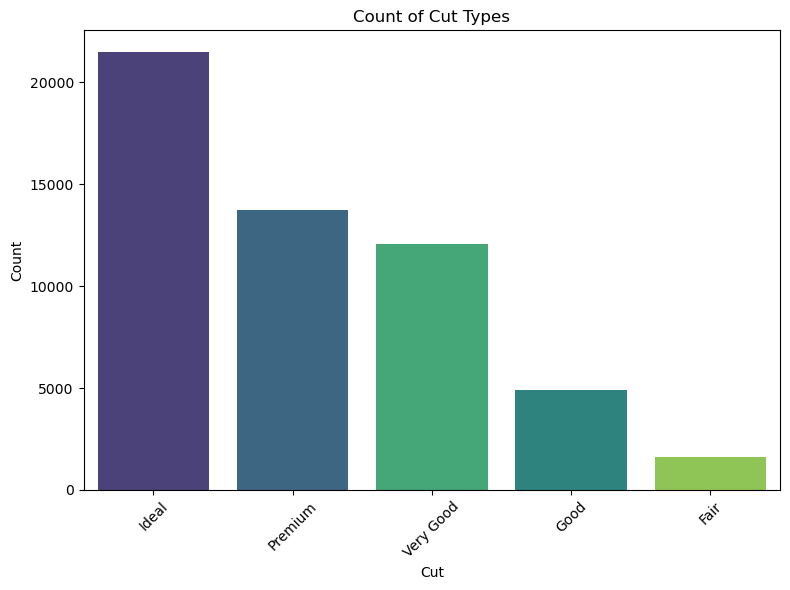

In [28]:
# Define the order in which you want to display the bars
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

# Plotting using seaborn with specified order
plt.figure(figsize=(8, 6)) 

sns.countplot(x='cut', data=dia, order=cut_order, palette='viridis', hue='cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Count of Cut Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure labels are not cut off
plt.show()


In [29]:
# Colour
dia['colour'].value_counts()

colour
G    11254
E     9776
F     9517
H     8266
D     6754
I     5406
J     2802
Name: count, dtype: int64

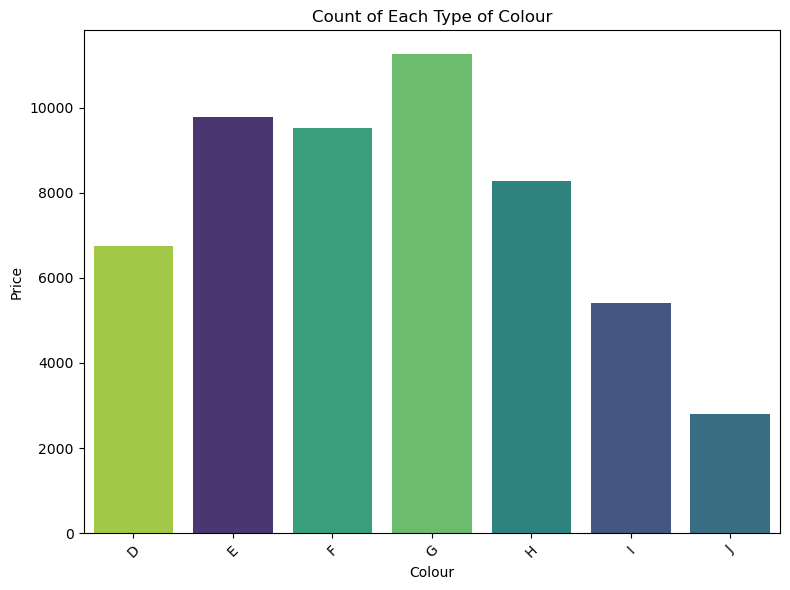

In [30]:
# Colour    

# Define the order in which you want to display the bars
colour_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
plt.figure(figsize=(8, 6))

sns.countplot(x='colour', data=dia, palette='viridis', order=colour_order, hue='colour') 
plt.xlabel('Colour')
plt.ylabel('Price')
plt.title('Count of Each Type of Colour')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

In [31]:
# Clarity
dia['clarity'].value_counts()


clarity
SI1     13030
VS2     12225
SI2      9142
VS1      8155
VVS2     5056
VVS1     3646
IF       1784
I1        737
Name: count, dtype: int64

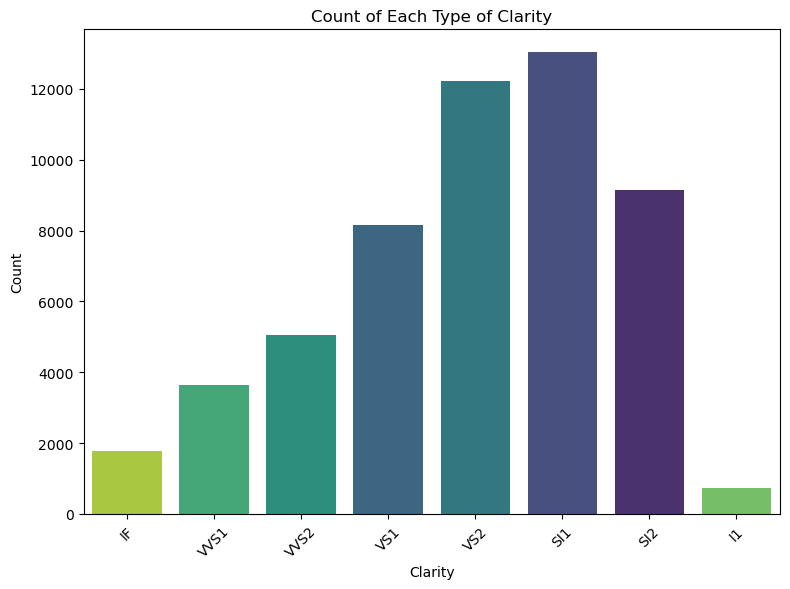

In [32]:
# Define the order in which you want to display the bars
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

plt.figure(figsize=(8, 6))

sns.countplot(x='clarity', data=dia, palette='viridis', order=clarity_order, hue='clarity') 
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.title('Count of Each Type of Clarity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

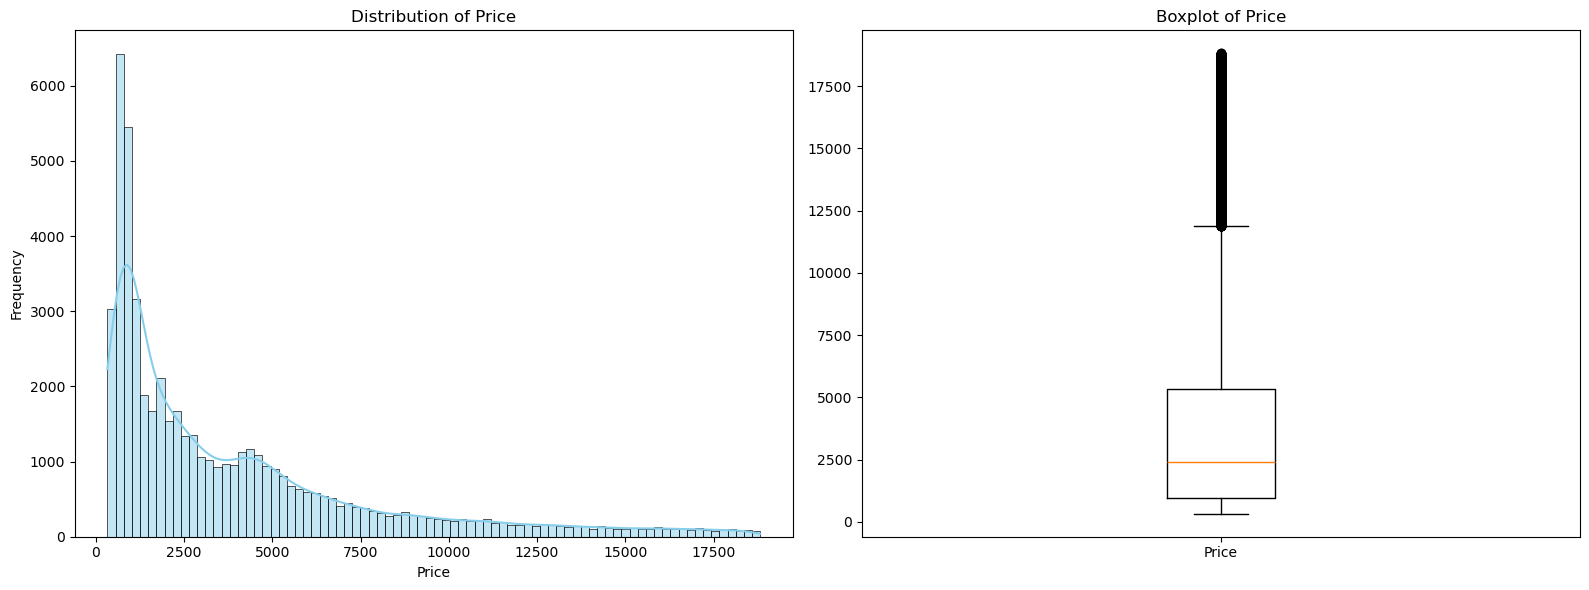

In [33]:
# Lets look at Price distribution first

# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(dia['price'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Price')

# Plotting boxplot using matplotlib
axes[1].boxplot(dia['price'])
axes[1].set_xticklabels(['Price'])
axes[1].set_title('Boxplot of Price')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

# NB: I used both sns and matplotlib as I prefer the sns visual for the hist and matplotlib for the boxplot

In [35]:
# Target variable (Price) is not normally distributed.
# Very right skewed.  Could affect the modelling.  May need to consider transforming the data e.g. BoxCox
dia.price.skew()

1.6182203665466373

In [36]:
# Also have potential outliers / anomalies.  How many?

from scipy import stats

# Z-Score: The Z-score measures how many standard deviations a data point is from the mean. \
# Typically, data points with a Z-score greater than 3 or less than -3 are considered outliers.

z_scores = stats.zscore(dia['price'])
outliers = (abs(z_scores) > 3)
num_outliers=sum(outliers)
print(num_outliers)

1201


In [37]:
# Although statistically there are outliers, visual inspection does not indicate any 'wild' values.
# I'll leave the data as is for now.

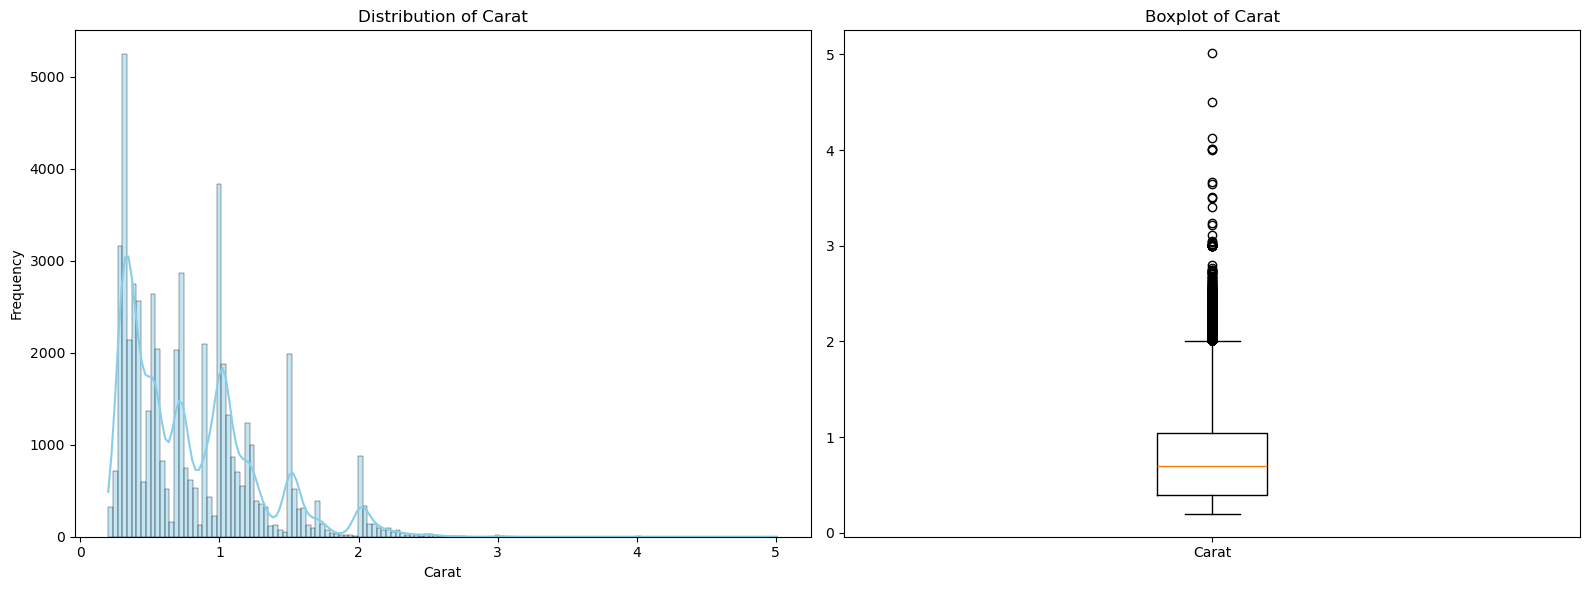

In [38]:
# Carat
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(dia['carat'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Carat')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Carat')

# Plotting boxplot using matplotlib
axes[1].boxplot(dia['carat'])
axes[1].set_xticklabels(['Carat'])
axes[1].set_title('Boxplot of Carat')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [43]:
# Potential outliers / anomalies in Carat
z_scores = stats.zscore(dia['carat'])
outliers = (abs(z_scores) > 3)
num_outliers=sum(outliers)
print(num_outliers)

429


In [44]:
# Same as for Price.  No 'wild' values.

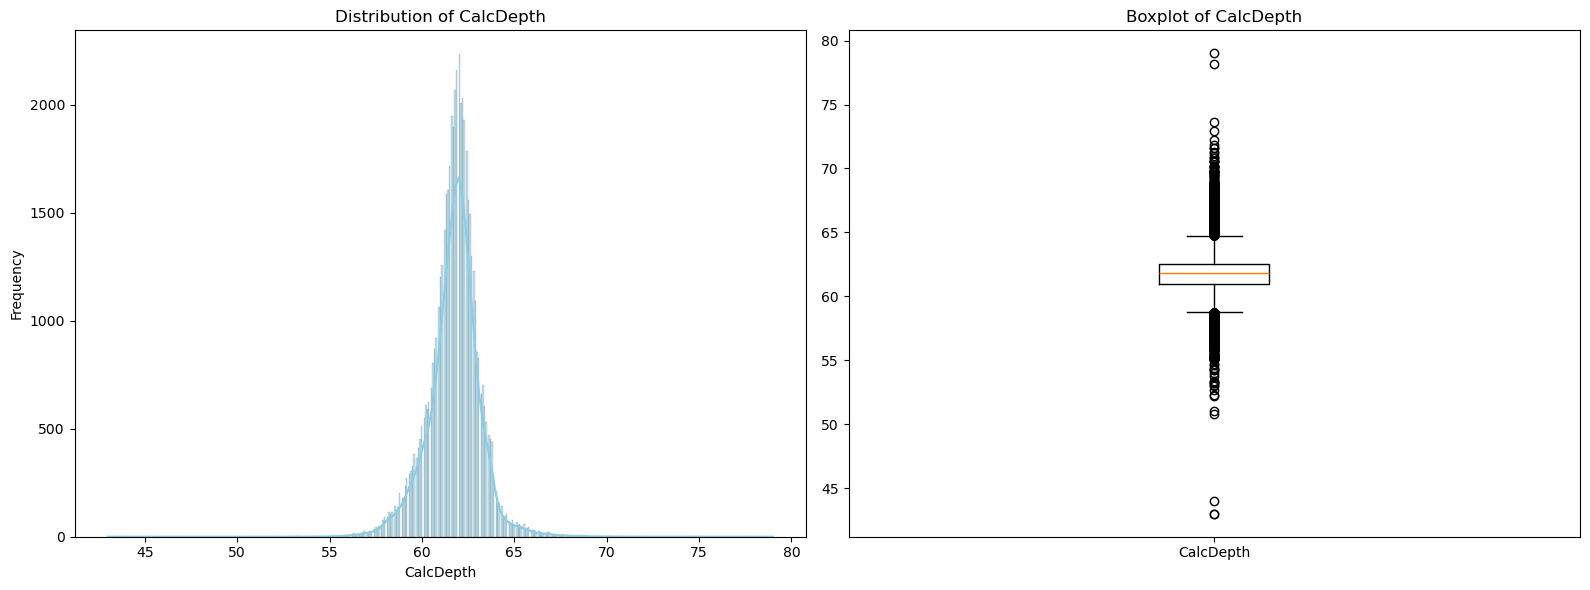

In [45]:
# CalcDepth
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(dia['calcdepth'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('CalcDepth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of CalcDepth')

# Plotting boxplot using matplotlib
axes[1].boxplot(dia['calcdepth'])
axes[1].set_xticklabels(['CalcDepth'])
axes[1].set_title('Boxplot of CalcDepth')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [46]:
# Need to check for outliers / anomalies

z_scores = stats.zscore(dia['calcdepth'])
outliers = (abs(z_scores) > 3)
num_outliers=sum(outliers)
print(num_outliers)

681


In [47]:
# There are two at the upper and two at the lower, but I have no immediate reason to remove them.

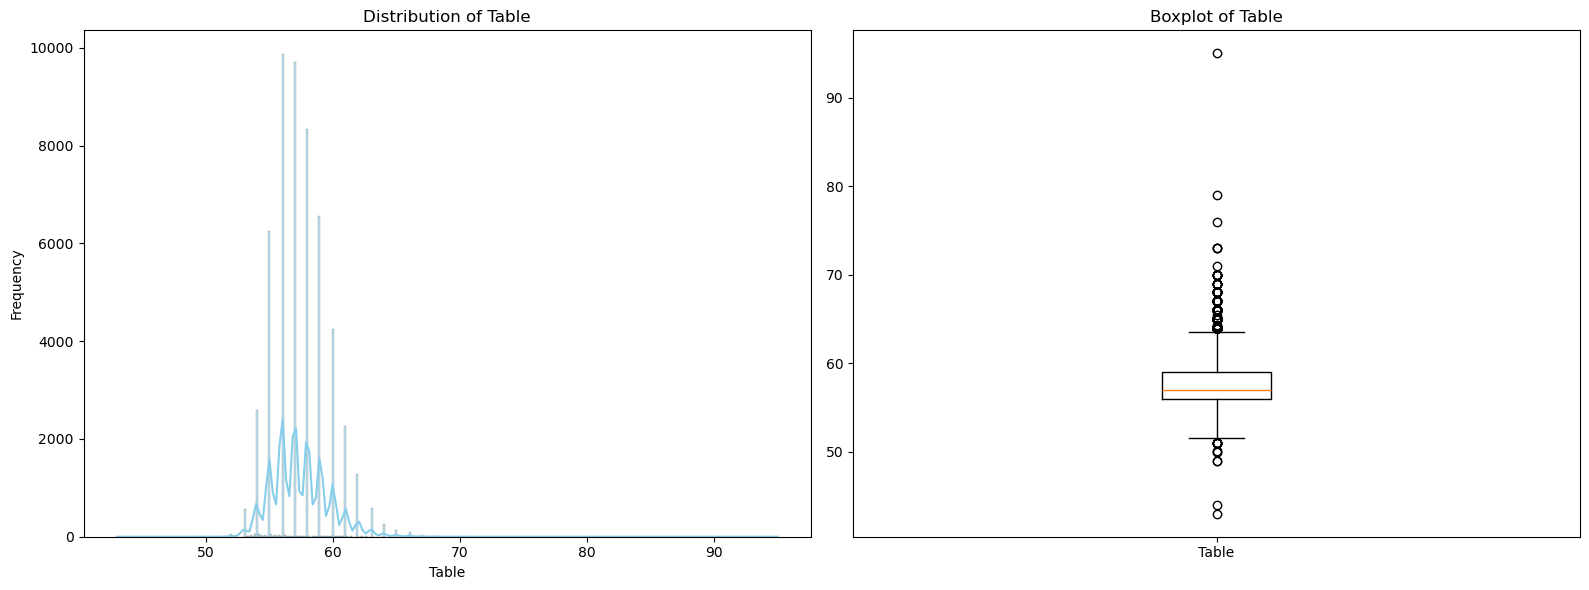

In [48]:
# Table
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(dia['table'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Table')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Table')

# Plotting boxplot using matplotlib
axes[1].boxplot(dia['table'])
axes[1].set_xticklabels(['Table'])
axes[1].set_title('Boxplot of Table')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [49]:
# Need to check for outliers / anomalies

z_scores = stats.zscore(dia['table'])
outliers = (abs(z_scores) > 3)
num_outliers=sum(outliers)
print(num_outliers)

334


In [50]:
# The value over 90 could be considered for exclusion.  Domain knowledge would be useful here.

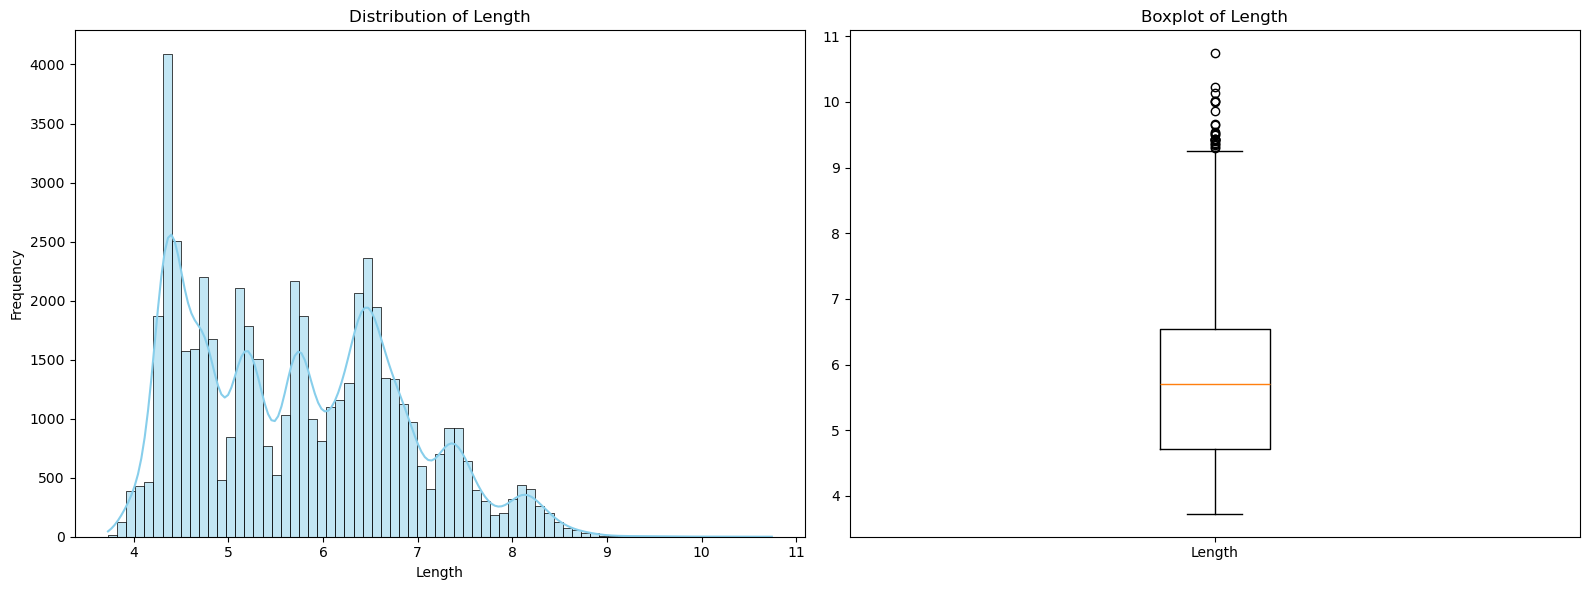

In [51]:
# Length
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(dia['length'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Length')

# Plotting boxplot using matplotlib
axes[1].boxplot(dia['length'])
axes[1].set_xticklabels(['Length'])
axes[1].set_title('Boxplot of Length')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [52]:
z_scores = stats.zscore(dia['length'])
outliers = (abs(z_scores) > 3)
num_outliers=sum(outliers)
print(num_outliers)

35


In [53]:
# Nothing to suggest 'wild' values

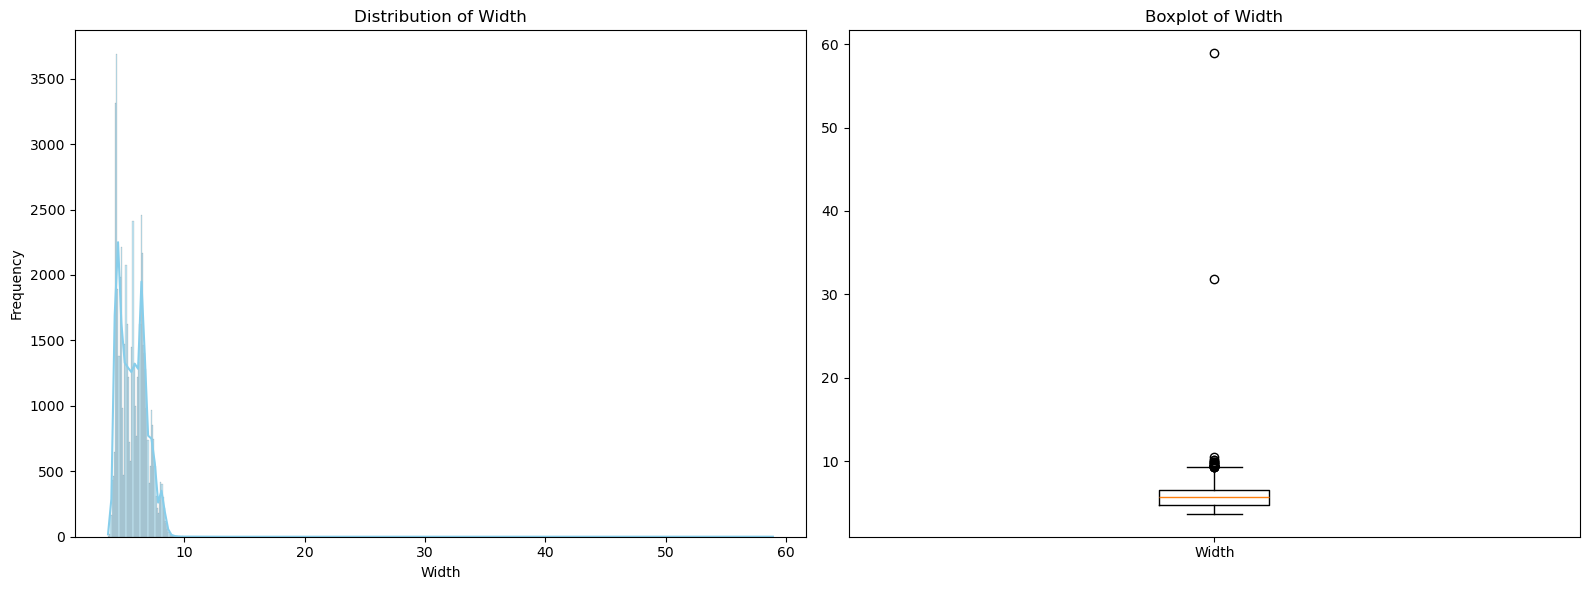

In [54]:
# Width
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(dia['width'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Width')

# Plotting boxplot using matplotlib
axes[1].boxplot(dia['width'])
axes[1].set_xticklabels(['Width'])
axes[1].set_title('Boxplot of Width')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [55]:
# Check for outliers / anomalies

z_scores = stats.zscore(dia['width'])
outliers = (abs(z_scores) > 3)
num_outliers=sum(outliers)
print(num_outliers)

27


In [56]:
# Two values could be considered for exclusion.

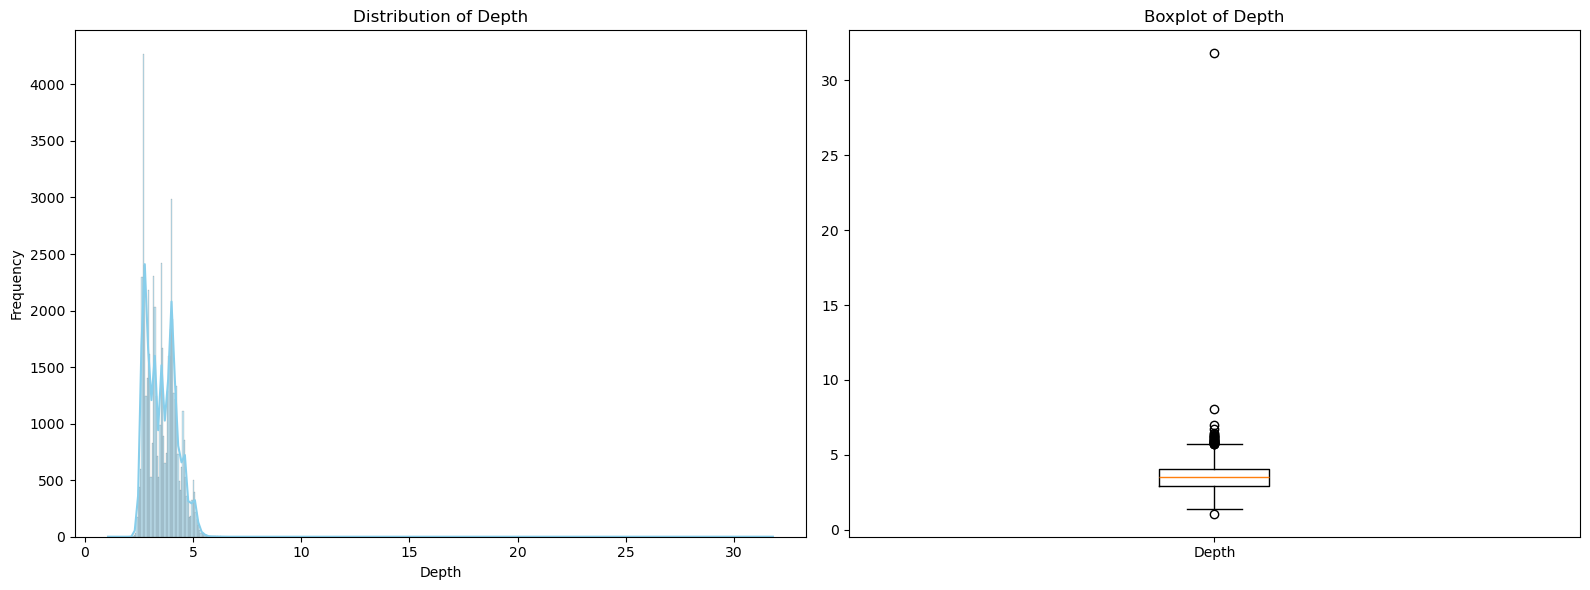

In [57]:
# Depths
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(dia['depths'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Depth')

# Plotting boxplot using matplotlib
axes[1].boxplot(dia['depths'])
axes[1].set_xticklabels(['Depth'])
axes[1].set_title('Boxplot of Depth')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [58]:
# Need to check for outliers / anomalies

z_scores = stats.zscore(dia['depths'])
outliers = (abs(z_scores) > 3)
num_outliers=sum(outliers)
print(num_outliers)

34


In [59]:
# One value to consider for possible exclusion.

In [60]:
# Start Comparing some variables

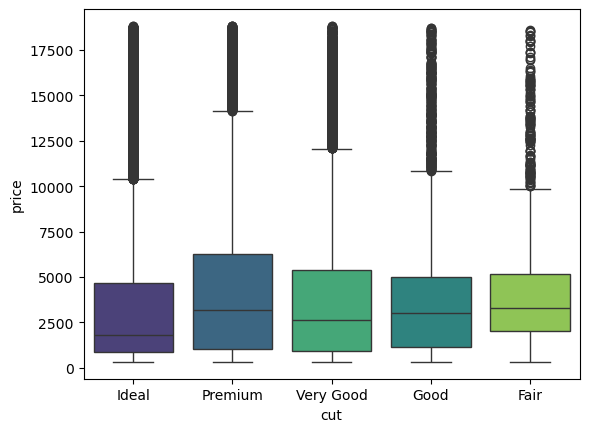

In [61]:
# Cut Quality vs Price
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
sns.boxplot(x='cut', y='price', data = dia, palette='viridis', order=cut_order, hue='cut')
plt.show()

In [63]:
# Ideal has lower mean than all other Cut types.
# Why is a perfectly cut stone worth less? Maybe it's not a strong predictor?

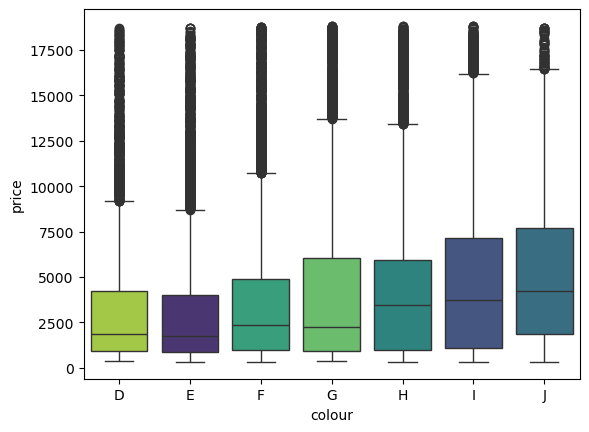

In [65]:
# Colour vs Price

colour_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
sns.boxplot(x='colour', y='price', data = dia, palette='viridis', order=colour_order, hue='colour')
plt.show()


In [66]:
# Again 'D' colour (best colour) has unexpectedly low Price value.
# Maybe 'Colour' is not a strong predictor.

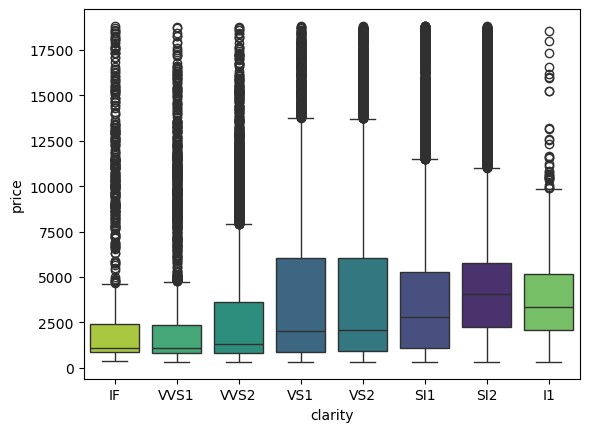

In [67]:
#Clarity vs Price

clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.boxplot(x='clarity', y='price', data = dia, palette='viridis', order=clarity_order, hue='clarity')
plt.show()

In [68]:
# 'IF' is best Clarity, but perhaps an outlier / anomalies effect?
# Clarity may not be a strong predictor

In [70]:
# So far Cut, Colour and Clarity do not seem to be strong predictors by themselves.
# In order to proceed with Feature selection, need to take care of categorical values (objects coded as integer values)

In [71]:
# Let's address 'cut'. First find unique values.
dia.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [73]:
dia.replace ({'Ideal':1, 'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5}, inplace=True)
dia.head()

C:\Users\mdjro\AppData\Local\Temp\ipykernel_28500\1776547466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dia.replace ({'Ideal':1, 'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5}, inplace=True)


,carat,cut,colour,clarity,calcdepth,table,price,length,width,depths
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [74]:
# Do the same for Colour
dia.colour.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [76]:
dia.replace ({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}, inplace=True)
dia.head()

,carat,cut,colour,clarity,calcdepth,table,price,length,width,depths
0,0.23,1,2,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,2,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,7,SI2,63.3,58.0,335,4.34,4.35,2.75


In [77]:
# Finally for Clarity
dia.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [78]:
dia.replace ({'IF':1, 'I1':2, 'VVS1':3, 'VVS2':4, 'VS2':5, 'VS1':6, 'SI1':7, 'SI2':8}, inplace=True)
dia.head()

C:\Users\mdjro\AppData\Local\Temp\ipykernel_28500\1820611078.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dia.replace ({'IF':1, 'I1':2, 'VVS1':3, 'VVS2':4, 'VS2':5, 'VS1':6, 'SI1':7, 'SI2':8}, inplace=True)


,carat,cut,colour,clarity,calcdepth,table,price,length,width,depths
0,0.23,1,2,8,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,7,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,2,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,7,8,63.3,58.0,335,4.34,4.35,2.75


In [79]:
# 'cut', 'colour' and 'clarity' should have been replaced.
# Let's check
dia[['cut', 'colour', 'clarity']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 53775 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cut      53775 non-null  int64
 1   colour   53775 non-null  int64
 2   clarity  53775 non-null  int64
dtypes: int64(3)
memory usage: 1.6 MB


In [80]:
# Success!  All are now integers and we can play with pairplot :-)

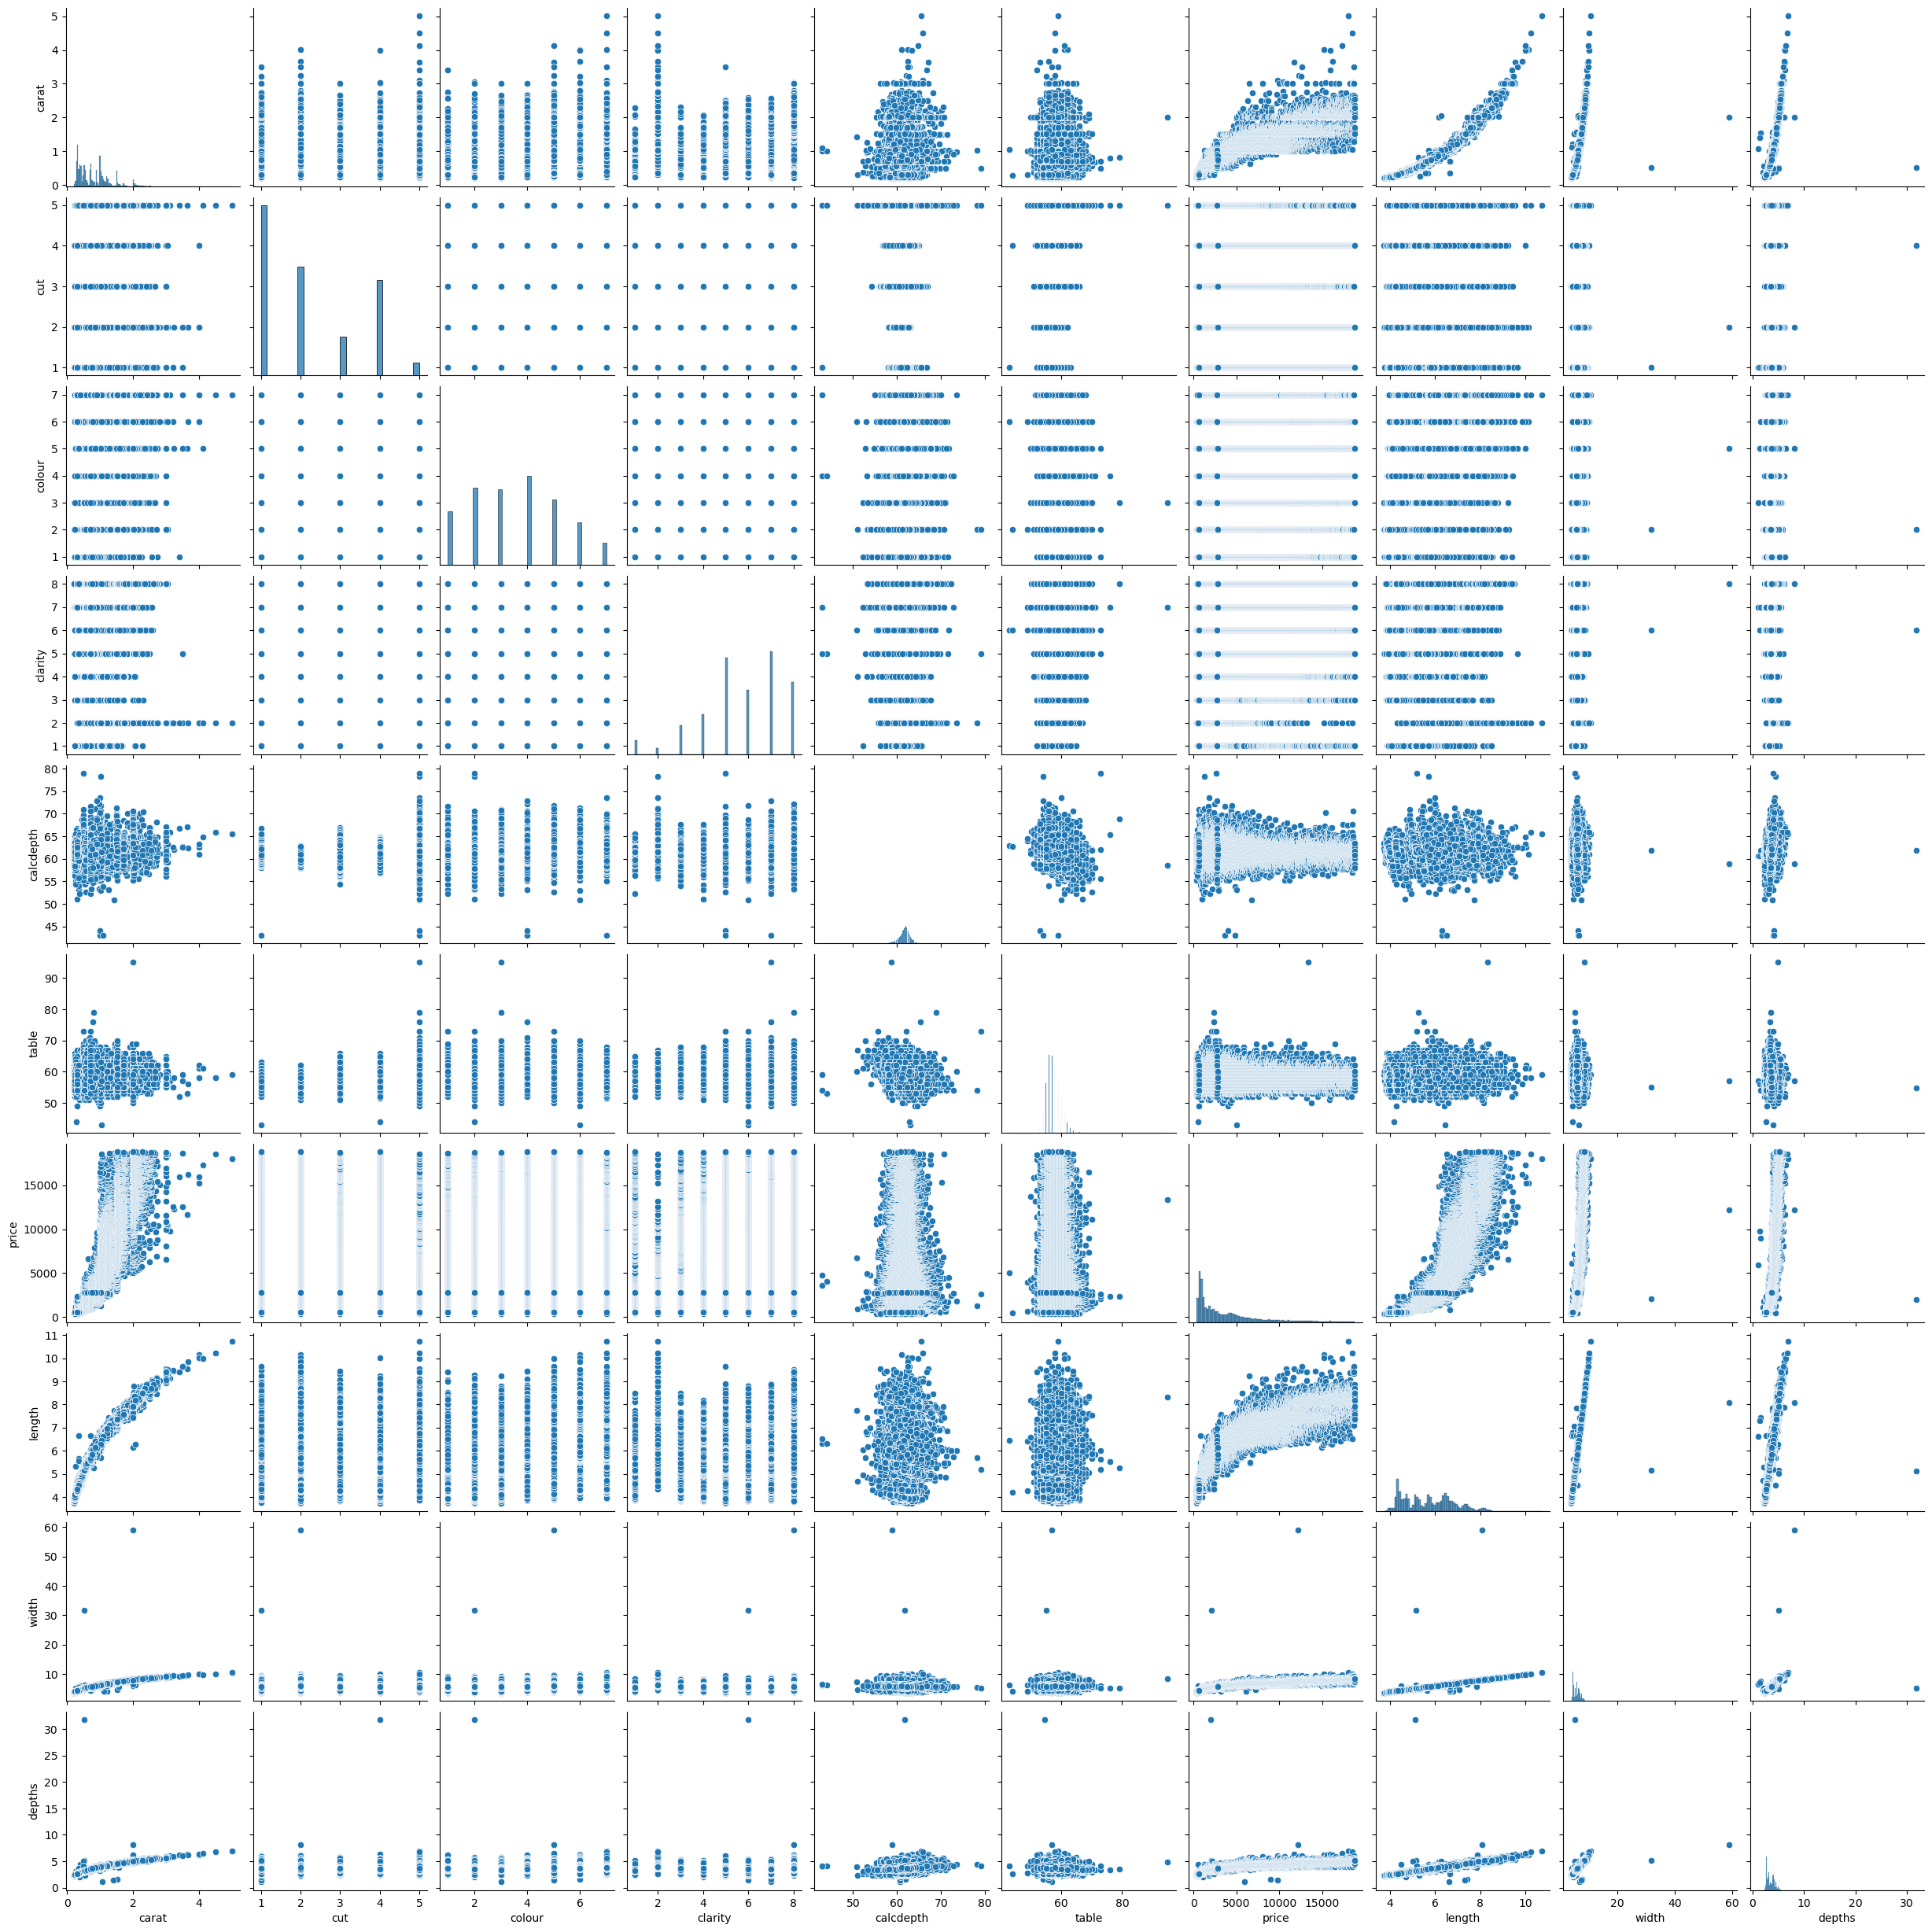

In [81]:
sns.pairplot(dia)

In [82]:
# Relationship between target and predictors is often not linear (more curved)
# Histplot of Price is not normally distributed and is very right-skewed (as noted above).
# This will possibly impact the ability to fit a linear model and may need to consider transformation of the data e.g. Boxcox.
# The potential anomalies in Table, Width and Depth are quite noticeable.
# For now, continue as is with the complete data set.

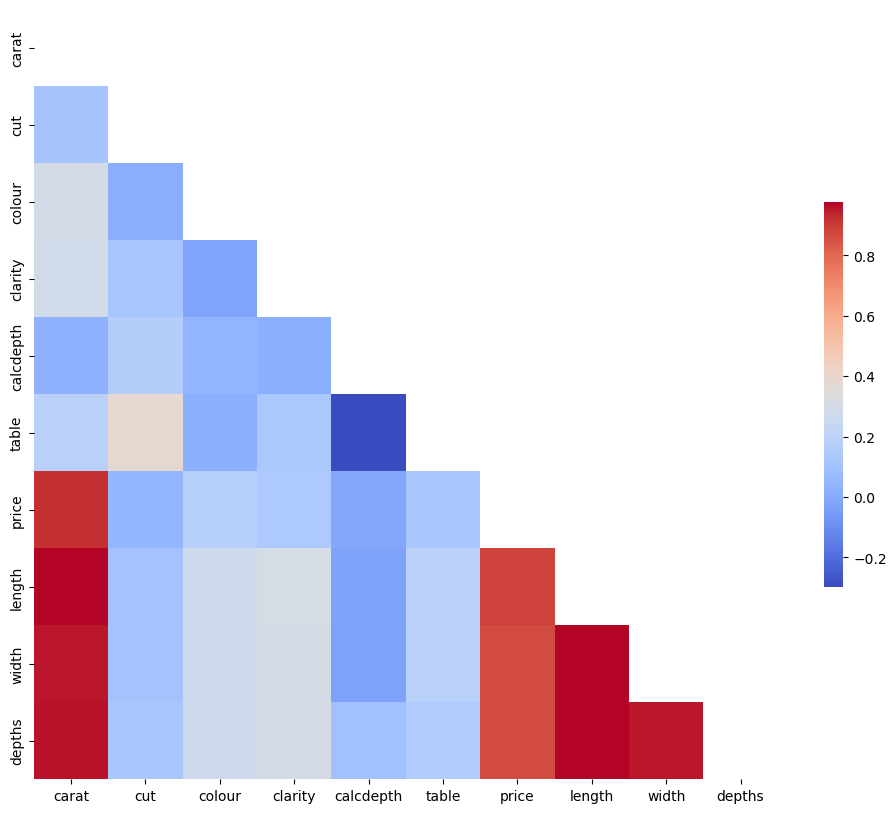

In [84]:
# Let's see what the correlation looks like
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(dia.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(dia.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

<Axes: >

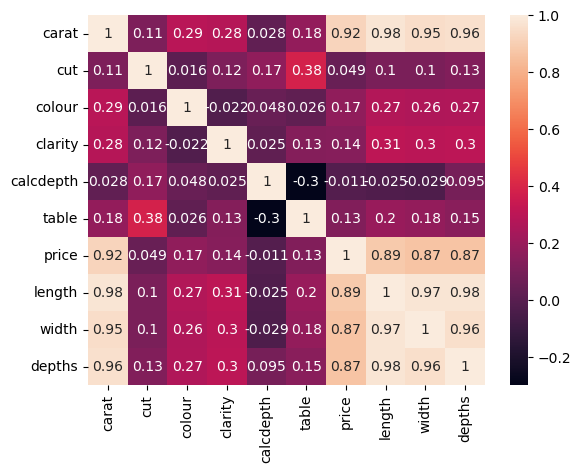

In [85]:
# Again with Seaborn

import seaborn as sns
corr = dia.corr()
sns.heatmap(corr,annot=True)


In [86]:
# First thoughts are that Carat, Length, Width and Depths are most strongly positively correlated
# Concerned that Length, Width, Depths (which are all indicators of diamond size)\
# will have a strong influence on the predicted price (multicollinearity) but maybe don't have time to address in this project.
# In future it might be worth considering using 'volume' i.e. L*W*D as a feature.

In [46]:
# Create a second dataframe that can be modified whilst leaving the original unchanged
#dia2=dia.copy()
#dia2.head()

,Carat,Cut,Color,Clarity,CalcDepth,Table,Price,Length,Width,ZDepth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
#dia2.shape

(53775, 10)

In [77]:
# Transform the Price data using BoxCox 
#from scipy.stats import boxcox

#bc_result = boxcox(dia2.Price)
#boxcox_price = pd.DataFrame(bc_result[0], columns=['boxcox_price'])
#lambd = bc_result[1]


In [78]:
#lambd

-0.05487841333772843

In [79]:
#dia.head()

,Carat,Cut,Color,Clarity,CalcDepth,Table,Price,Length,Width,ZDepth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


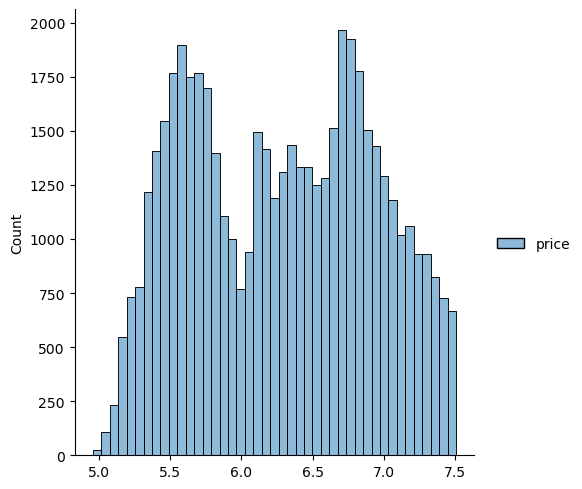

In [72]:
# Check Price distribution after transformation
s#ns.displot(boxcox_price)


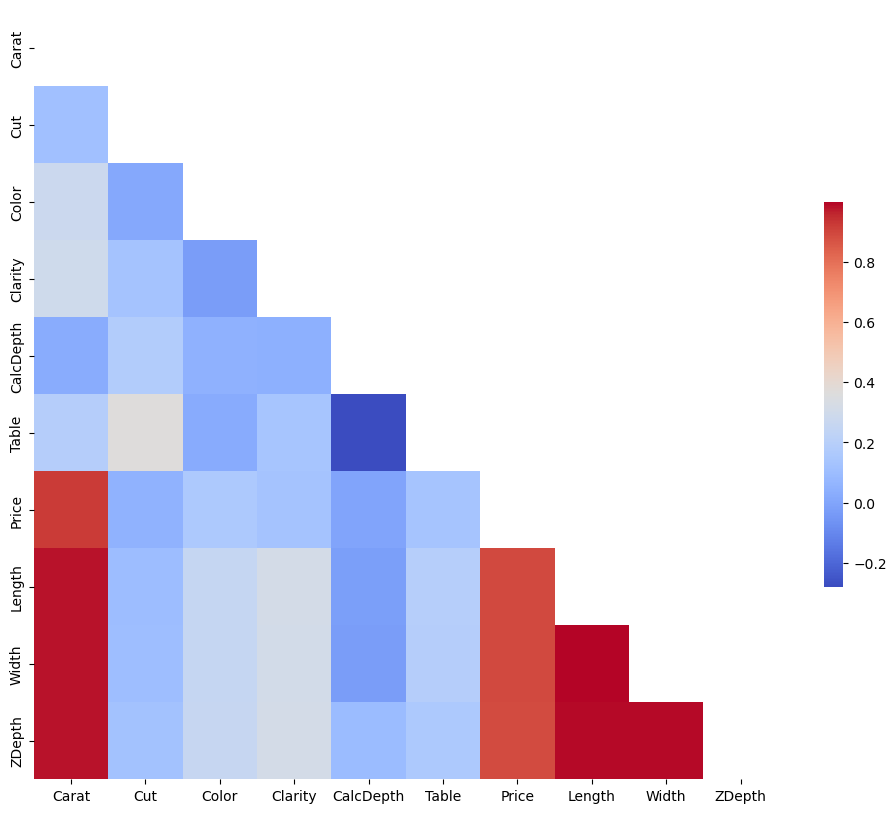

In [73]:
# Try a corr plot?  Diagonal

# Create a mask for the upper triangle
#mask = np.triu(np.ones_like(dia2.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
#plt.figure(figsize=(12, 10))
#sns.heatmap(dia2.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

#plt.show()

<Axes: >

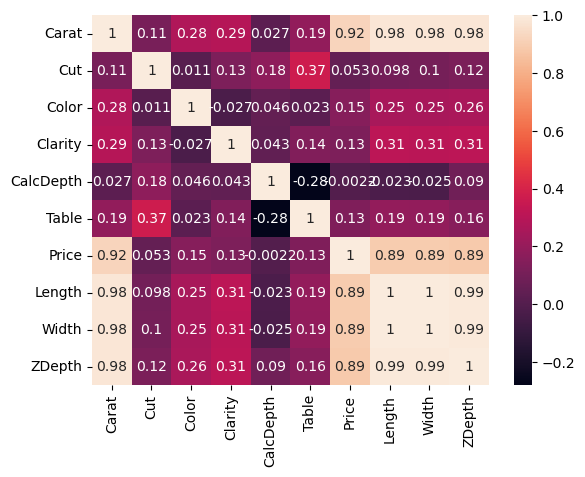

In [74]:
#import seaborn as sns
#corr = dia2.corr()
#sns.heatmap(corr,annot=True)


#### Change the color map cmap

In [65]:
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [75]:
# define the target variable (dependent variable) as y
#y = dia2['boxcox_price']

# Take all columns except target as predictor columns
#predictor_columns = [c for c in dia2.columns if c != 'boxcox_price']
# Load the dataset as a pandas data frame
#X = pd.DataFrame(dia2, columns = predictor_columns)

KeyError: 'boxcox_price'

In [ ]:
## Create training and testing subsets

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Trying normal Linear Regression

In [ ]:
#model = LinearRegression()

In [ ]:
# define the target variable (dependent variable) as y
y = dia2['Price_boxcox']

# Take all columns except target as predictor columns
#predictor_columns = [c for c in dia2.columns if c != 'Price_boxcox']
# Load the dataset as a pandas data frame
#X_2 = pd.DataFrame(dia2, columns = predictor_columns)

#model.fit(X_2, y)


In [ ]:
# Find R^2 score
#r2_score = model.score(X_2,y)
#print('R-squared (score method):', r2_score)

In [ ]:
# Split data
#X_2_train, X_2_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#model.fit(X_2_train, y_train)

In [ ]:
#score = model.score(X_2_test, y_test)
#print(score)

In [ ]:
# Make predictions on the test set
#y_pred = model.predict(X_2_test)

In [ ]:
# Evaluate the model
#print('R2_value:', r2_score(y_test, y_pred))
#print('MAE:', mean_absolute_error(y_test, y_pred))
#print('MSE:', mean_squared_error(y_test, y_pred))
#print('Score:', model.score(X_2_test, y_test))

In [ ]:
# Visualise the result
#sns.histplot(dia2.Price_boxcox, kde=True, label='Actual Values')
#sns.histplot(y_pred, kde=True, label='Predicted Values')
#plt.legend()
#plt.show()

In [ ]:
# Create a scatterplot
#plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_pred, color='blue', alpha=0.9, edgecolors='k', s=100)

# Add a regression line
#sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={"color": "r", "lw": 2})

#plt.xlabel("Actual Values", fontsize=14)
#plt.ylabel("Predicted Values", fontsize=14)
#plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)


#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)


#plt.show()

In [ ]:
#def view_coeff(X, model):
    #linreg_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': linreg.coef_,
                                'abs_coef': np.abs(linreg.coef_)})
   # linreg_coefs.sort_values('abs_coef', inplace=True, ascending=False)
   # sns.barplot(x="variable", y="coef", data=linreg_coefs)

In [ ]:
# Plot Coefficients
#view_coeff(X_2, linreg)

In [ ]:
# Create a third dataframe that can be modified whilst leaving the others unchanged
#dia3=dia2.copy()
#dia3.head()

In [ ]:
# Drop Width and ZDepth.......................add width and depth when re-running
#dia3.drop(columns=['Price_boxcox'], axis=1, inplace=True)
#dia3.head()

In [ ]:
#corr = dia3.corr()
#sns.heatmap(corr,annot=True)

In [ ]:
#model_2 = LinearRegression()

In [ ]:
# define the target variable (dependent variable) as y
#y = dia3['Price']

# Take all columns except target as predictor columns
#predictor_columns2 = [c for c in dia3.columns if c != 'Price']
# Load the dataset as a pandas data frame
#X_3 = pd.DataFrame(dia3, columns = predictor_columns2)

#model.fit(X_3, y)

In [ ]:
# Split data
#X_3_train, X_3_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
#model.fit(X_3_train, y_train)

In [ ]:
#score2 = model.score(X_3_test, y_test)
#print(score2)

In [ ]:
# Make predictions on the test set
#y_pred = model.predict(X_3_test)

In [ ]:
# Evaluate the model
#print('R2_value:', r2_score(y_test, y_pred))
#print('MAE:', mean_absolute_error(y_test, y_pred))
#print('MSE:', mean_squared_error(y_test, y_pred))
#print('Score:', model.score(X_3_test, y_test))

In [ ]:
# Visualise the result
#sns.histplot(dia3.Price, kde=True, label='Actual Values')
#sns.histplot(y_pred, kde=True, label='Predicted Values')
#plt.legend()
#plt.show()

In [ ]:
#Maximum Average price per Cut and Clarity of diamond
#cut_clarity=diamond.groupby(["cut","clarity"]).aggregate(avg_price=("price","mean"))
#cut_clarity=cut_clarity.reset_index()
#cut_clarity.sort_values(["cut","avg_price"],ascending=[True,False])
#temp=cut_clarity.groupby(["cut"]).aggregate(max_price=("avg_price","max")).reset_index()
#cut_clarity=cut_clarity.merge(temp,left_on="avg_price",right_on="max_price",how="right")
#cut_clarity=cut_clarity[["cut_x","clarity","avg_price"]]
#cut_clarity.rename(columns={"cut_x":"cut"},inplace=True)
#cut_clarity

In [ ]:
# Average price by cut quality of diamond
#cut_quality=diamond.groupby(["cut"]).aggregate(avg_price=("price","mean"))
#cut_quality=cut_quality.reset_index()
#cut_quality.sort_values("avg_price",ascending=False)
#y = cut_quality["avg_price"]
#x = cut_quality["cut"]

# plot
#fig, ax = plt.subplots()
#plt.xlabel("Cut Quality")
#plt.ylabel("Average Price in $")
#ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

#plt.show()

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#rom sklearn.model_selection import train_test_split

#X = df.drop(labels=['price'],axis=1)
#Y = df['price']

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

#model = RandomForestRegressor()
#model.fit(X_train,Y_train)

In [ ]:
#from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#y_pred=model.predict(X_test)
#print('R2:', r2_score(Y_test,y_pred))
#print('MAE: ', mean_absolute_error(Y_test,y_pred))
#print('MSE: ', mean_squared_error(Y_test,y_pred))
#print('Score: ', model.score(X_test,Y_test))

In [ ]:
# cross validation

#from sklearn.model_selection import KFold


In [ ]:
#def visualize_importance(models, feat_train_dia2):

   # feature_importance_dia2 = pd.DataFrame()
   # for i, model in enumerate(models):
      #  _dia2 = pd.DataFrame()
      #  _dia2['feature_importance'] = model.feature_importances_
      #  _dia2['column'] = feat_train_df.columns
      #  _dia2['fold'] = i + 1
      #  feature_importance_dia2 = pd.concat([feature_importance_dia2, _dia2], 
                                          axis=0, ignore_index=True)

    #order = feature_importance_dia2.groupby('column')\
      #  .sum()[['feature_importance']]\
      #  .sort_values('feature_importance', ascending=False).index[:50]

    #print(order.tolist())
    
    #fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    #sns.boxenplot(data=feature_importance_dia2, 
                #  x='feature_importance', 
                #  y='column', 
                #  order=order, 
                #  ax=ax, 
                #  palette='viridis', 
                #  orient='h')
    
   # ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Importance')
   # ax.grid()
   # fig.tight_layout()
    
   # return fig,ax

#fig, ax = visualize_importance(models, train_feat_df)

In [ ]:
#for i in range(1):
   # fold = KFold(n_splits=5, shuffle=True, random_state=71)
    #ydia2i=ydia2f.iloc[:,i]
    #y=np.array(ydia2i)
   # cv = list(fold.split(train_feat_dia2, y))
    #oof, models = fit_lgbm(train_feat_dia2.values, y, cv, params=params, verbose=500)
   # fig, ax = visualize_importance(models, train_feat_dia2)
   # ax.set_title(target[i]+' Importance',fontsize=20)